# Fundamentals of Machine Learning - Exercise 1
The aim of the exercise is to get an overview of the basic capabilities of the Pandas, Matplotlib and Seaborn libraries and be able to setup a Python Virtual Enviroment (`venv`)

**Jupyter lab**

* Add code
* Add text
* Execute command
* Shortcuts (a, b, dd, Ctrl+Enter, Shift+Enter, x, c, v)

**Alternatives**

* Google Colab ([Colaboratory](https://colab.research.google.com/))
* Python scripts in VS Code

"![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_01_meme_01.png?raw=true)

# Data processing

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Pandas tasks:
* Load data
* Standard data inspection (functions head(), tail(), describe(), isna(), shape)
* Select one attribute to variable
    - Series and numpy compatibility
* dtype, index, columns
* Data selection - [], loc, iloc
* Data filtering and logical operators
* Add new column to dataframe
* Calculate new numberical attribute
* Data selection - comparison and negation
* Assign new values to selected rows from dataframe
* Use .apply() for rows and single column
* Use .groupby() for data aggregation

## Import used packages

In [14]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## The first step is to load the data into the Pandas DataFrame - in our case it is a csv file
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv

In [15]:
df_full = pd.read_csv("https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv")

## We shloud take a look on the data after loading so we know that everything is OK

### We will start with showing first/last N rows
- There are several ways of doing that:
    - name of the dataframe
    - head()
    - tail()

### Show 5 first and last rows

In [ ]:
df_full

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Show first 5 rows

In [ ]:
df_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Show last 20 rows

In [ ]:
df_full.tail(20)

## If we want to know if there are any missing values, the isna() function may render useful

In [ ]:
df_full.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

## We can show summary of common statistical characteristic of the data using the describe() function

In [ ]:
df_full.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 💡 Dataframe has several useful properties
    - shape
    - dtypes
    - columns
    - index

#### Row and column count

In [ ]:
df_full.shape

(1460, 81)

#### Datatypes of columns

In [ ]:
df_full.dtypes.head(20)

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
dtype: object

#### Column names

In [ ]:
df_full.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Row index values

In [ ]:
df_full.index

RangeIndex(start=0, stop=1460, step=1)

## We may want to work with just one column not the whole dataframe
- We will select only the SalePrice columns and save it to another variable

In [ ]:
df_full["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## Columns are called Pandas Series - it shares a common API with Pandas DataFrame
- 💡 Pandas is numpy-backed so we can use Series as standard numpy arrays without any issues using the .values property

In [ ]:
df_full.SalePrice.values

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

## Find maximum price using Numpy and Pandas

In [ ]:
df_full.SalePrice.max()

755000

In [ ]:
np.max(df_full.SalePrice)

755000

## Data filtering using Pandas DataFrame
- There are several ways of filtering the data (similar logic to .Where() in C# or WHERE in SQL)
- 💡 We usually work with two indexers - .loc[] and .iloc[]

### The .iloc[] indexer works with positional indexes - very close to the way of working with the raw arrays
### The .loc[] indexer works with column names and logical expressions

### Select all rows and 3rd column of dataframe

In [ ]:
df_full.iloc[:, 3]

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

### Select all rows and LAST column of dataframe

In [ ]:
df_full.iloc[:, -1]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### Select rows 15 to 22 and all columns

In [ ]:
df_full.iloc[15:23, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
18,19,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,159000
19,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml,139000
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
22,23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,230000


### Select rows 15 to 22 and 3rd column

In [ ]:
df_full.iloc[15:23, 2]

15    RM
16    RL
17    RL
18    RL
19    RL
20    RL
21    RM
22    RL
Name: MSZoning, dtype: object

## Select only a subset of columns to a new dataframe
* 'Id', 'SalePrice','MSSubClass','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','Heating','CentralAir','GrLivArea','BedroomAbvGr'

In [ ]:
df = df_full.loc[:, ['Id', 'SalePrice','MSSubClass','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','Heating','CentralAir','GrLivArea','BedroomAbvGr']].copy()
df.head()

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr
0,1,208500,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3
1,2,181500,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3
2,3,223500,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3
3,4,140000,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3
4,5,250000,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4


### Select only houses built in year 2000 or later
* YearBuilt

In [ ]:
df[df.YearBuilt >= 2000]

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr
0,1,208500,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3
2,3,223500,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3
4,5,250000,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4
6,7,307000,20,1Fam,1Story,8,5,2004,GasA,Y,1694,3
11,12,345000,60,1Fam,2Story,9,5,2005,GasA,Y,2324,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1444,1445,179600,20,1Fam,1Story,7,5,2004,GasA,Y,1422,3
1451,1452,287090,20,1Fam,1Story,8,5,2008,GasA,Y,1578,3
1452,1453,145000,180,TwnhsE,SLvl,5,5,2005,GasA,Y,1072,2
1453,1454,84500,20,1Fam,1Story,5,5,2006,GasA,Y,1140,3


### Select only houses that don't use GasA for heating (!= or ~ operators)
* Heating

In [ ]:
df[~(df.Heating == "GasA")]

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr
69,70,225000,50,1Fam,1.5Fin,7,4,1953,GasW,Y,2287,3
93,94,133900,190,2fmCon,2.5Unf,6,6,1910,GasW,N,2291,4
108,109,115000,50,1Fam,1.5Fin,5,7,1919,GasW,N,1517,3
155,156,79000,50,1Fam,1.5Fin,6,5,1924,Grav,N,1096,2
275,276,205000,50,1Fam,1.5Fin,7,7,1925,GasW,N,1548,3
313,314,375000,20,1Fam,1Story,7,5,1965,GasW,Y,2036,3
342,343,87500,90,Duplex,1Story,3,4,1949,Wall,N,1040,2
417,418,239000,70,1Fam,2Story,6,6,1918,GasW,N,2624,4
514,515,96500,45,1Fam,1.5Unf,5,5,1926,Grav,N,789,2
636,637,60000,30,1Fam,1Story,2,3,1936,Grav,N,800,1


In [ ]:
df[df.Heating != "GaSa"]

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr
0,1,208500,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3
1,2,181500,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3
2,3,223500,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3
3,4,140000,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3
4,5,250000,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,60,1Fam,2Story,6,5,1999,GasA,Y,1647,3
1456,1457,210000,20,1Fam,1Story,6,6,1978,GasA,Y,2073,3
1457,1458,266500,70,1Fam,2Story,7,9,1941,GasA,Y,2340,4
1458,1459,142125,20,1Fam,1Story,5,6,1950,GasA,Y,1078,2


### Select houses cheaper than 180k USD and with at least 2 bedrooms
* SalePrice, BedroomAbvGr

In [ ]:
df[(df.SalePrice <= 180000) & (df.BedroomAbvGr >= 2)]

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr
3,4,140000,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3
8,9,129900,50,1Fam,1.5Fin,7,5,1931,GasA,Y,1774,2
9,10,118000,190,2fmCon,1.5Unf,5,6,1939,GasA,Y,1077,2
10,11,129500,20,1Fam,1Story,5,5,1965,GasA,Y,1040,3
12,13,144000,20,1Fam,1Story,5,6,1962,GasA,Y,912,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,145000,180,TwnhsE,SLvl,5,5,2005,GasA,Y,1072,2
1453,1454,84500,20,1Fam,1Story,5,5,2006,GasA,Y,1140,3
1455,1456,175000,60,1Fam,2Story,6,5,1999,GasA,Y,1647,3
1458,1459,142125,20,1Fam,1Story,5,6,1950,GasA,Y,1078,2


### Select houses with 2 stories or air conditioning
* HouseStyle, CentralAir

In [ ]:
df[(df.HouseStyle == "2Story") | (df.CentralAir == "Y")]

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr
0,1,208500,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3
1,2,181500,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3
2,3,223500,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3
3,4,140000,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3
4,5,250000,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,60,1Fam,2Story,6,5,1999,GasA,Y,1647,3
1456,1457,210000,20,1Fam,1Story,6,6,1978,GasA,Y,2073,3
1457,1458,266500,70,1Fam,2Story,7,9,1941,GasA,Y,2340,4
1458,1459,142125,20,1Fam,1Story,5,6,1950,GasA,Y,1078,2


# We can add new columns to the DataFrame as well

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_01_meme_02.png?raw=true)

### Add a new column named Age for each house (current year - year built)
* YearBuilt

In [ ]:
df

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr,Age
0,1,208500,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3,20
1,2,181500,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3,47
2,3,223500,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3,22
3,4,140000,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3,108
4,5,250000,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,60,1Fam,2Story,6,5,1999,GasA,Y,1647,3,24
1456,1457,210000,20,1Fam,1Story,6,6,1978,GasA,Y,2073,3,45
1457,1458,266500,70,1Fam,2Story,7,9,1941,GasA,Y,2340,4,82
1458,1459,142125,20,1Fam,1Story,5,6,1950,GasA,Y,1078,2,73


In [ ]:
df["Age"] = 2023 - df.YearBuilt

### Add a new column IsLuxury with True value for houses with more than 3 bedrooms and price above 214k USD (.loc)
- How many luxury houses are in the dataset?
- SalePrice, BedroomAbvGr

In [16]:
df

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr,Undervalued
0,1,208500,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3,False
1,2,181500,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3,False
2,3,223500,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3,False
3,4,140000,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3,False
4,5,250000,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,60,1Fam,2Story,6,5,1999,GasA,Y,1647,3,False
1456,1457,210000,20,1Fam,1Story,6,6,1978,GasA,Y,2073,3,False
1457,1458,266500,70,1Fam,2Story,7,9,1941,GasA,Y,2340,4,False
1458,1459,142125,20,1Fam,1Story,5,6,1950,GasA,Y,1078,2,False


In [ ]:
df["IsLuxury"] = (df.BedroomAbvGr) > 3 & (df.SalePrice > 214000)

## Pandas enables us to use aggregation functions for the data using the .groupby() function

### Compute counts for all the heating methods (groupby / value_counts)
* Heating

In [ ]:
df.groupby("Heating").Heating.count()

Heating
Floor       1
GasA     1428
GasW       18
Grav        7
OthW        2
Wall        4
Name: Heating, dtype: int64

In [ ]:
df.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

# Visualization

## Scatter plot
- Visualize relationship between SalePrice and GrLivArea.
- Use scatter plot from **Matplotlib**.

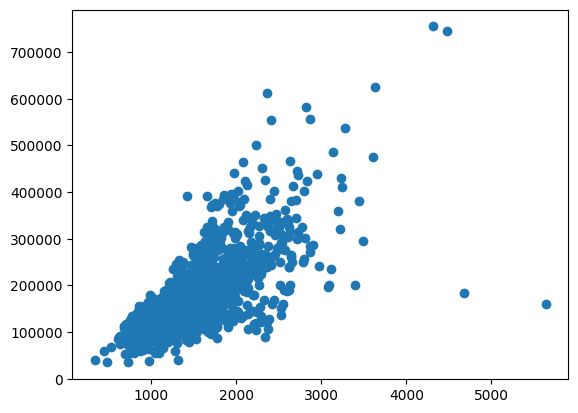

In [ ]:
plt.scatter(x=df.GrLivArea, y=df.SalePrice)

### Modify figure size and add title

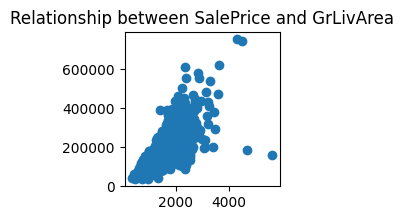

In [ ]:
plt.figure(figsize=(2, 2))
plt.title("Relationship between SalePrice and GrLivArea")
plt.scatter(x=df.GrLivArea, y=df.SalePrice)

### Add axis labels

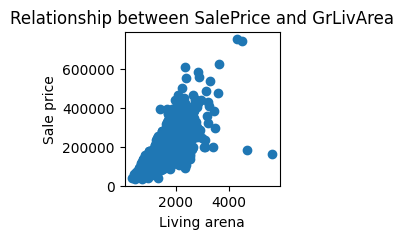

In [ ]:
plt.figure(figsize=(2, 2))
plt.title("Relationship between SalePrice and GrLivArea")
plt.xlabel("Living arena")
plt.ylabel("Sale price")
plt.scatter(x=df.GrLivArea, y=df.SalePrice)

### Add colors for data points based on CentralAir value.

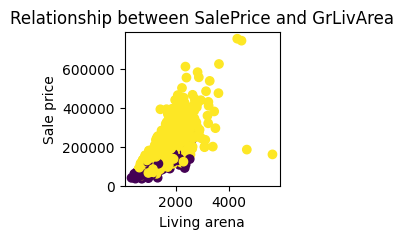

In [ ]:
plt.figure(figsize=(2, 2))
plt.title("Relationship between SalePrice and GrLivArea")
plt.xlabel("Living arena")
plt.ylabel("Sale price")
plt.scatter(x=df.GrLivArea, y=df.SalePrice, c=(df.CentralAir == "Y"))

## Try to use scatterplot from **Seaborn** library for scatter plot visualization.

#### Use dataframe as source and column names for axes data

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

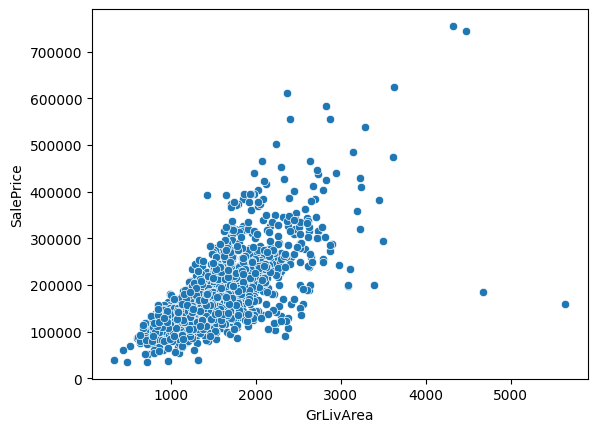

In [ ]:
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")

### Resize plot and add color for markers based on CentralAir column

## Line plot
- Calculate and vizualize average house price in relationship to YearBuild.

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

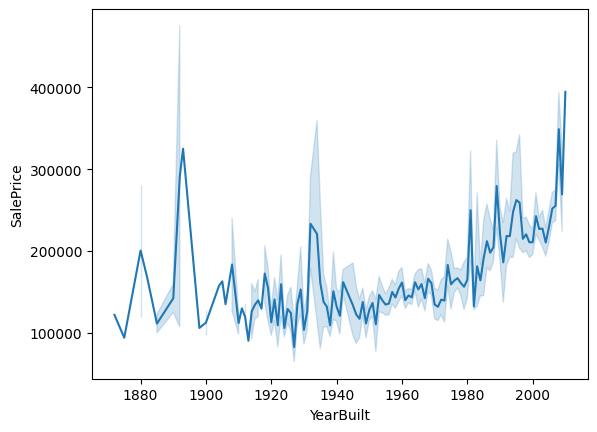

In [ ]:
sns.lineplot(data=df, x="YearBuilt", y="SalePrice")

## Bar plot
- Calculate and vizualize how many of houses have CentralAir
- Use Barplot for visualization

<Axes: xlabel='CentralAir', ylabel='count'>

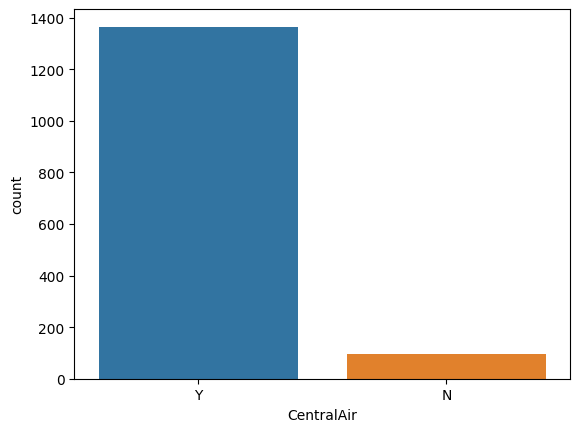

In [ ]:
sns.countplot(data=df, x="CentralAir")

### Vizualize number of building type and if they contains air conditioning using Seaborn

<Axes: xlabel='BldgType', ylabel='count'>

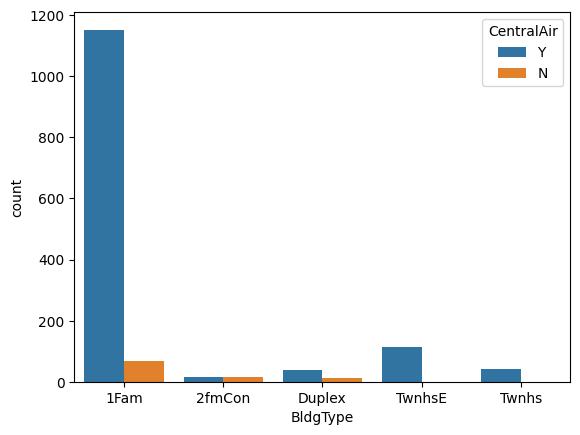

In [ ]:
sns.countplot(data=df, x="BldgType", hue="CentralAir")

In [18]:
df["BuiltBefore2000"] = df["YearBuilt"] < 2000


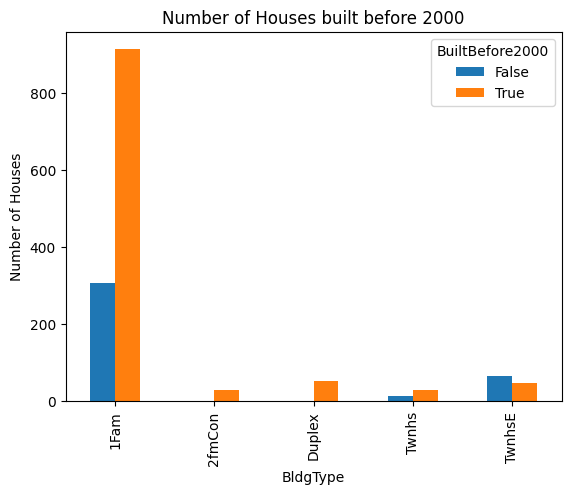

In [20]:
grouped = df.groupby(["BldgType", "BuiltBefore2000"]).size().unstack()
ax = grouped.plot(kind='bar', stacked=False)
ax.set_xlabel("BldgType")
ax.set_ylabel("Number of Houses")
ax.set_title("Number of Houses built before 2000")
plt.show()

In [ ]:
count_undervalued = df["Undervalued"].sum()

In [ ]:
count_undervalued

120

In [ ]:
df

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr,Undervalued,BuiltBefore2000
0,1,208500,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3,False,False
1,2,181500,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3,False,True
2,3,223500,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3,False,False
3,4,140000,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3,False,True
4,5,250000,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,60,1Fam,2Story,6,5,1999,GasA,Y,1647,3,False,True
1456,1457,210000,20,1Fam,1Story,6,6,1978,GasA,Y,2073,3,False,True
1457,1458,266500,70,1Fam,2Story,7,9,1941,GasA,Y,2340,4,False,True
1458,1459,142125,20,1Fam,1Story,5,6,1950,GasA,Y,1078,2,False,True


In [ ]:
df["Undervalued"] = (df["SalePrice"] < 163000) & (df["OverallQual"] > 5) & (df["OverallCond"] > 5)


# Tasks
## ✅ Pandas (1 pt)
* Add a new column *Undervalued* which is set to True in case that the house is priced bellow 163k USD and has both OverallQual and OverallCond higher than 5.

* **How many undervalued houses are in the dataset?**

## ✅ Vizualization (1 pt)
* Add to dataframe new attribute determining if the house was build before or after year 2000.

* **Create bar chart for number of houses depending on type of dwelling (attribute BldgType, use as a category axis) and added binary attribute about house age (use as a bar color).**